<a href="https://colab.research.google.com/github/Surojit-KB/UNIV-AI-AI3-HW2/blob/main/homework2_full_scaffold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](fig/univ.png)

# AI-3: Language Models

## Homework 1: RNNs and ELMo


**AI3 April 2021**<br/>
**Univ.AI**<br/>
**Instructor**: Pavlos Protopapas<br />
**Maximum Score**: 100

<hr style="height:2pt">

In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [2]:
# Import necessary libraries

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import backend
from sklearn.decomposition import PCA
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model, Sequential,model_from_json
from tensorflow.keras.layers import Input, SimpleRNN, Embedding, Dense, TimeDistributed, GRU,Dropout, Bidirectional, Conv1D, BatchNormalization
import warnings
warnings.filterwarnings("ignore")
    
# Set seed for repeatable results
np.random.seed(123)
tf.random.set_seed(456)
plt.style.use("ggplot")

<span style="color:blue">
**Please note that this notebook is the intellecutal property of Univ.AI and sharing or disseminating it without the explicit consent of Univ.AI is against the academic policy**
</span>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### INSTRUCTIONS


- This homework is a jupyter notebook. Download and work on it on your local machine.

- This homework should be submitted in pairs.

- Ensure you and your partner together have submitted the homework only once. Multiple submissions of the same work will be penalised by 2 points.

- Please restart the kernel and run the entire notebook again before you submit.

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code works restart the kernel and run the whole notebook again before you submit. 

- To submit the homework, one of you upload the working notebook on edStem and click the submit button on the bottom right corner.

- Submit the homework well before the given deadline. Submissions after the deadline will not be graded.

- We have tried to include all the libraries you may need to do the assignment in the imports statement at the top of this notebook. We strongly suggest that you use those and not others as we may not be familiar with them.

- Comment your code well. This would help the graders in case there is any issue with the notebook while running. It is important to remember that the graders will not troubleshoot your code. 

- Please use .head() when viewing data. Do not submit a notebook that is **excessively long**. 

- In questions that require code to answer, such as "calculate the $R^2$", do not just output the value from a cell. Write a `print()` function that includes a reference to the calculated value, **not hardcoded**. For example: 
```
print(f'The R^2 is {R:.4f}')
```
- Your plots should include clear labels for the $x$ and $y$ axes as well as a descriptive title ("MSE plot" is not a descriptive title; "95 % confidence interval of coefficients of polynomial degree 5" is).

- If any helper function does not work for you please feel free to alter it to suit your requirements and variable names.

- **Ensure you make appropriate plots for all the questions it is applicable to, regardless of it being explicitly asked for.**

- **Some cells have code, which are meant to help view the output of your code. They will work only for specific variable names. In case you use different variable names, (only if it is not specifically mentioned in the question), alter the print code given to you.**

<span style="color:red">**Model training can be very slow; start doing this HW early.**</span>


<hr style="height:2pt">

### Names of the people who worked on this homework together
#### / Names here/

### DATASET ACCESS

**Please note that all the datasets used in this homework is available to you on edStem. You will find it in the resources tab (on the top right) next to your lessons tab. Additionally, some datasets have been provided in a form that will allow you to access it directly on google colab by uncommenting and running some cells.**

### **HOMEWORK QUIZ**

**For each part of the homework, there is an associated quiz on edStem. You are required to attempt that after completing each section of this homework. Please note that the quiz is one attempt only.**


![](fig/one_attempt.png)

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
    
## **PART 1 [35 points]: Named Entity Recognition**
<br />    
Named entity recognition (NER) seeks to locate and classify named entities present in unstructured text into predefined categories such as organizations, locations, expressions of times, names of persons, etc. This technique is often used in real use cases such as classifying content for news providers, efficient search algorithms over large corpora and content-based recommendation systems. 

This represents an interesting "many-to-many" problem, allowing us to experiment with recurrent architectures and compare their performances against other models.
    
    
In the first part of the homework, you are expected to build a model that will tag words into predefined categories.  
    
    
The dataset consists of sentences (```Sentence #``` column), each composed of words (```Word``` column) with part-of-speech tagging (```POS``` tagging) and inside–outside–beginning (IOB) named entity tags (```Tag``` column) attached. ```POS``` will not be used for this homework. We will predict ```Tag``` using only the words themselves.

Essential info about entities:
* geo = Geographical Entity
* org = Organization
* per = Person
* gpe = Geopolitical Entity
* tim = Time indicator
* art = Artifact
* eve = Event
* nat = Natural Phenomenon

IOB prefix:
* B: beginning of named entity
* I: inside of named entity
* O: outside of named entity

</div>

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">

## **PART 1: Questions**
<br />

### **1.1 [14 points] PREPROCESS THE DATASET**
<br />
    
**1.1.1** - Read in the dataset `named_entity.csv` into a pandas dataframe using the provided code below.
<br /><br />
    
**1.1.2** - Create a list of unique words found in the 'Word' column and sort it in alphabetic order. Then append the special word "ENDPAD" to the end of the list, and assign it to the variable ```words```. Store the length of this list as ```n_words```. **Print your results for `n_words`**.
<br /><br />
    
**1.1.3** - Create a list of unique tags and sort it in alphabetic order. Then append the special word "PAD" to the end of the list, and assign it to the variable ```tags```. Store the length of this list as ```n_tags```. **Print your results for `n_tags`**.
<br /><br />
    
**1.1.4** - Process the data into a list of sentences where each sentence is a list of (word, tag) tuples. Here is an example of how the first sentence in the list should look:

[('Thousands', 'O'),
 ('of',  'O'),
 ('demonstrators', 'O'),
 ('have', 'O'),
 ('marched', 'O'),
 ('through', 'O'),
 ('London', 'B-geo'),
 ('to', 'O'),
 ('protest', 'O'),
 ('the', 'O'),
 ('war', 'O'),
 ('in', 'O'),
 ('Iraq', 'B-geo'),
 ('and', 'O'),
 ('demand', 'O'),
 ('the', 'O'),
 ('withdrawal', 'O'),
 ('of', 'O'),
 ('British', 'B-gpe'),
 ('troops', 'O'),
 ('from', 'O'),
 ('that', 'O'),
 ('country', 'O'),
 ('.', 'O')]
 
<br />
    
**1.1.5** - Find out the number of words in the longest sentence, and store it to variable ```max_len```. **Print your results for `max_len`.**
<br /><br />
    
**1.1.6** - It's now time to convert the sentences data in a suitable format for the RNNs training/evaluation procedures. Create a ```word2idx``` dictionary mapping distinct words from the dataset into distinct integers. Also create a ```idx2word``` dictionary.
<br /><br />
    
**1.1.7** - Prepare the predictors matrix ```X```, as a list of lists, where each inner list is a sequence of words mapped into integers accordly to the ```word2idx``` dictionary. 
<br /><br />
    
**1.1.8** - Apply the keras ```pad_sequences``` function to standardize the predictors. You should retrieve a matrix with all padded sentences and length equal to ```max_len``` previously computed. The dimensionality should therefore be equal to ```[# of sentences, max_len]```. Run the provided cell to print your results. Your ```X[i]``` now should be something similar to this:
<br />
    
`[ 8193 27727 31033 33289 22577 33464 23723 16665 33464 31142 31319 28267
 27700 33246 28646 16052    21 16915 17349  7924 32879 32985 18238 23555
    24 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178
 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178
 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178
 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178
 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178
 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178
 35178 35178 35178 35178 35178 35178 35178 35178]`
<br /><br />
    
**1.1.9** - Create a ```tag2idx``` dictionary mapping distinct named entity tags from the dataset into distinct integers. Also create a ```idx2tag``` dictionary.
<br /><br />
    
**1.1.10** - Prepare targets matrix ```Y```, as a list of lists,where each inner list is a sequence of tags mapped into integers accordly to the ```tag2idx``` dictionary.
<br /><br />
    
**1.1.11** - Apply the keras ```pad_sequences``` function to standardize the targets. Inject the ```PAD``` tag for the padding words. You should retrieve a matrix with all padded sentences'tags and length equal to ```max_length``` previously computed. 
<br /><br />
    
**1.1.12** - Use the ```to_categorical``` keras function to one-hot encode the tags. Now your ```Y``` should have dimension ```[# of sentences, max_len, n_tags]```. Run the provided cell to print your results.
<br /><br />
    
**1.1.13** - Split the dataset into train and test sets (test 10%).
<br /><br />
    
### **1.2 [10 points] MODELLING THE DATA**
      
After preparing the train and test sets, you need to build the following model:
    
> - Bidirectional Gated Recurrent Neural Network with input/ouput dimensionalities as 

input: [# of sentences, max_len]
output: [# of sentences, max_len, n_tags]
Follow the information in each model's section to set up the architecture of each model.

A further plot_training_history helper function is given in case you need to check the training history.
<br /><br />  
    
**1.2.1** - BIDIRECTIONAL GATED RECURRENT NEURAL NETWORK
<br />
    
**1.2.1.1** - Explain how a Bidirectional GRU differs from RNNs and LSTMs.
<br />
    
**1.2.1.2** - Define, compile, and train a bidirectional GRU by wrapping your GRU layer in a Bidirectional one. Use the provided code to plot the training history.
<br />
    
**1.2.1.3** - Visualize outputs from bidirectional GRU layer, one subplot for B-tags and one subplot for I-tags. Comment on the patterns you observed.
<br /><br />


    
### **1.3 [6 points] MODEL ANALYSIS**
<br />
    
**1.3.1** - For the defined model:
<br />
    
> - Apply the model to the test dataset. Compute an F1 score for each ```Tag``` and store it. 
<br />
    
> - Plot the F1 score per Tag for the defined model using barplots.
<br />
    
> - Briefly discuss the performance of the model
    
<br />


    
### **1.4 [5 points] HOMEWORK QUIZ**
<br />
After attempting this part of the homework, answer the questions on edStem. All the questions depend on this part of the homework and you will not be able to answer them without attempting this part.
  
<br /><br />
    
    
</div>

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
    
## **PART 1: Solutions**
<br />

### **1.1 [14 points] PREPROCESS THE DATASET**
<br />
    
**1.1.1** - Read in the dataset `named_entity.csv` into a pandas dataframe using the provided code below.
<br /><br />

</div>

In [ ]:
# If you are using colab, uncomment the following code to access the notebook directly

!gdown --id "1dQFceoih3o3ZP-h3EAJ4Xj8DSgRQ0VTB"

Downloading...
From: https://drive.google.com/uc?id=1dQFceoih3o3ZP-h3EAJ4Xj8DSgRQ0VTB
To: /content/ner_dataset.csv
15.2MB [00:00, 71.2MB/s]


In [ ]:
# Code to read the data
data = pd.read_csv('ner_dataset.csv',
                   encoding="latin1")
data = data.fillna(method="ffill")
data.head(15)

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O
5,Sentence: 1,through,IN,O
6,Sentence: 1,London,NNP,B-geo
7,Sentence: 1,to,TO,O
8,Sentence: 1,protest,VB,O
9,Sentence: 1,the,DT,O


In [ ]:
data.Tag.value_counts()

O        887908
B-geo     37644
B-tim     20333
B-org     20143
I-per     17251
B-per     16990
I-org     16784
B-gpe     15870
I-geo      7414
I-tim      6528
B-art       402
B-eve       308
I-art       297
I-eve       253
B-nat       201
I-gpe       198
I-nat        51
Name: Tag, dtype: int64

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
    
**1.1.2** - Create a list of unique words found in the 'Word' column and sort it in alphabetic order. Then append the special word "ENDPAD" to the end of the list, and assign it to the variable ```words```. Store the length of this list as ```n_words```. **Print your results for `n_words`**.
<br />

</div>

In [ ]:
# Your code here
# Count number of words
words=sorted(list(set(data.Word.values)))
words.append('ENDPAD')
n_words=len(words)

In [ ]:
# Run this cell to show your results for n_words
print(n_words)

35179


<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">


**1.1.3** - Create a list of unique tags and sort it in alphabetic order. Then append the special word "PAD" to the end of the list, and assign it to the variable ```tags```. Store the length of this list as ```n_tags```. **Print your results for `n_tags`**.
<br />

</div>

In [ ]:
# Your code here
# Count number of tags
tags=list(set(data.Tag.values))
tags.append('PAD')
n_tags=len(tags)

In [ ]:
# Run this cell to show your results for n_tags
print(n_tags)

18


<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">

**1.1.4** - Process the data into a list of sentences where each sentence is a list of (word, tag) tuples. Here is an example of how the first sentence in the list should look:

[('Thousands', 'O'),
 ('of',  'O'),
 ('demonstrators', 'O'),
 ('have', 'O'),
 ('marched', 'O'),
 ('through', 'O'),
 ('London', 'B-geo'),
 ('to', 'O'),
 ('protest', 'O'),
 ('the', 'O'),
 ('war', 'O'),
 ('in', 'O'),
 ('Iraq', 'B-geo'),
 ('and', 'O'),
 ('demand', 'O'),
 ('the', 'O'),
 ('withdrawal', 'O'),
 ('of', 'O'),
 ('British', 'B-gpe'),
 ('troops', 'O'),
 ('from', 'O'),
 ('that', 'O'),
 ('country', 'O'),
 ('.', 'O')]
 
<br />
    
</div>

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
# Your code here
# Get maximum sentence length as padding size
list_of_sentence=[list(zip(data[data['Sentence #']==i]['Word'],data[data['Sentence #']==i]['Tag'])) for i in tqdm(data['Sentence #'].unique())]

In [ ]:
import pickle
file_name='/content/drive/MyDrive/Colab Notebooks/UNIV-AI-AI3/list_of_sentence.pkl'

In [ ]:
open_file = open(file_name, "wb")
pickle.dump(list_of_sentence, open_file)
open_file.close()

In [ ]:
open_file = open(file_name, "rb")
list_of_sentence = pickle.load(open_file)
open_file.close()

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">

**1.1.5** - Find out the number of words in the longest sentence, and store it to variable ```max_len```. **Print your results for `max_len`.**
<br />   
    
</div>

In [ ]:
# Your code here
# Get the number of words in the longest sentence
max_size=max(list_of_sentence,key=len)
max_len=len(max_size)

In [ ]:
# Run this cell to show your results for max_len
print(max_len)

104


<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">

**1.1.6** - It's now time to convert the sentences data in a suitable format for the RNNs training/evaluation procedures. Create a ```word2idx``` dictionary mapping distinct words from the dataset into distinct integers. Also create a ```idx2word``` dictionary.
<br />  
    
</div>

In [ ]:
# Your code here
# Create dictionary to map words to integers
word2idx= {w:i for i,w in enumerate(words)}
idx2word= {i:w for i,w in enumerate(words)}

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">

**1.1.7** - Prepare the predictors matrix ```X```, as a list of lists, where each inner list is a sequence of words mapped into integers accordly to the ```word2idx``` dictionary. 
<br />
    
</div>

In [ ]:
# Your code here
# Prepare predictors list of lists
X=[[word2idx[j[0]] for j in i] for i in list_of_sentence]

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">

**1.1.8** - Apply the keras ```pad_sequences``` function to standardize the predictors. You should retrieve a matrix with all padded sentences and length equal to ```max_len``` previously computed. The dimensionality should therefore be equal to ```[# of sentences, max_len]```. Run the provided cell to print your results. Your ```X[i]``` now should be something similar to this:
<br />
    
`[ 8193 27727 31033 33289 22577 33464 23723 16665 33464 31142 31319 28267
 27700 33246 28646 16052    21 16915 17349  7924 32879 32985 18238 23555
    24 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178
 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178
 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178
 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178
 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178
 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178
 35178 35178 35178 35178 35178 35178 35178 35178]`
<br />

</div>

In [ ]:
# Your code here
# Apply the keras pad_sequences function
X=pad_sequences(X, maxlen=max_len,padding='post',value=word2idx['ENDPAD'])

In [ ]:
# Run this cell to show your results #
print("Sentence 1: {}\n".format(X[1]))
print(X.shape)

Sentence 1: [ 6283 27700 31967 25619 24853 33246 19981 25517 33246 29399 34878 19044
 18095 34971 32712 31830 17742     1  4114 11464 11631 14985     1 17364
     1 14484 33246  3881    24     1 35178 35178 35178 35178 35178 35178
 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178
 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178
 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178
 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178
 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178
 35178 35178 35178 35178 35178 35178 35178 35178]

(47959, 104)


<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">

**1.1.9** - Create a ```tag2idx``` dictionary mapping distinct named entity tags from the dataset into distinct integers. Also create a ```idx2tag``` dictionary.
<br />
    
</div>

In [ ]:
# Your code here
# Create dictionary to map tags to integers
tag2idx= {t:i for i,t in enumerate(tags)}
idx2tag= {i:t for i,t in enumerate(tags)}

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">

**1.1.10** - Prepare targets matrix ```Y```, as a list of lists,where each inner list is a sequence of tags mapped into integers accordly to the ```tag2idx``` dictionary.
<br />
    
</div>

In [ ]:
# Your code here
# Prepare targets list of lists
Y=[[tag2idx[j[1]] for j in i] for i in list_of_sentence]

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">

**1.1.11** - Apply the keras ```pad_sequences``` function to standardize the targets. Inject the ```PAD``` tag for the padding words. You should retrieve a matrix with all padded sentences'tags and length equal to ```max_length``` previously computed. 
<br />
    
</div>

In [ ]:
# Your code here
# Apply the kera pas_sequences function
Y=pad_sequences(Y, maxlen=max_len,padding='post',value=tag2idx['PAD'])

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">

**1.1.12** - Use the ```to_categorical``` keras function to one-hot encode the tags. Now your ```Y``` should have dimension ```[# of sentences, max_len, n_tags]```. Run the provided cell to print your results.
<br />
    
</div>

In [ ]:
# Your code here
# Onehot encode target variable
Y=to_categorical(Y)

In [ ]:
# Run this cell to show your results #
print("The index of tag 'B-gpe' is: {}\n".format(tag2idx["B-gpe"]))
print("The tag of the last word in Sentence 1: {}\n".format(Y[0][-1]))
print(np.array(Y).shape)

The index of tag 'B-gpe' is: 1

The tag of the last word in Sentence 1: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]

(47959, 104, 18)


<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
    
**1.1.13** - Split the dataset into train and test sets (test 10%).
<br />
    
</div>

In [ ]:
# Your code here
# Split train/test datasets
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.1,random_state=42)

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">

### **1.2 [10 points] MODELLING THE DATA**
      
After preparing the train and test sets, you need to build the following model:
    
> - Bidirectional Gated Recurrent Neural Network with input/ouput dimensionalities as 
    * input: [# of sentences, max_len]
    * output: [# of sentences, max_len, n_tags]
    * Follow the information in each model's section to set up the architecture of each model.

A further plot_training_history helper function is given in case you need to check the training history.
<br /><br />  
    
**1.2.1** - BIDIRECTIONAL GATED RECURRENT NEURAL NETWORK
<br />
    
> **1.2.1.1** - Explain how a Bidirectional GRU differs from the RNNs and LSTMs.
<br />
    
    
</div>


**Your answer here**

### Use these hyperparameters for the NN models

In [ ]:
n_units = 100
drop_rate = .1
dim_embed = 50

optimizer = "rmsprop"
loss = "categorical_crossentropy"
metrics = ["accuracy"]

batch_size = 32
epochs = 10
validation_split = 0.1
verbose = 1

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">

> **1.2.1.2** - Define, compile, and train a bidirectional GRU by wrapping your GRU layer in a Bidirectional one. Use the provided code to plot the training history.
<br />

</div>

In [ ]:
# Your code here
# Define model
model=Sequential()
model.add(Embedding(input_dim=n_words,output_dim=dim_embed))
model.add(tf.keras.layers.Masking(mask_value=word2idx['ENDPAD']))
model.add(Bidirectional(GRU(n_units,return_sequences=True,dropout=drop_rate),merge_mode='concat'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(drop_rate))
model.add(Dense(n_tags, activation='softmax'))
model.compile(optimizer=optimizer,loss=loss,metrics=metrics)

In [ ]:
# Run this cell to show your results #
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 50)          1758950   
_________________________________________________________________
masking_1 (Masking)          (None, None, 50)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 200)         91200     
_________________________________________________________________
dense_1 (Dense)              (None, None, 64)          12864     
_________________________________________________________________
dropout (Dropout)            (None, None, 64)          0         
_________________________________________________________________
dense_2 (Dense)              (None, None, 18)          1170      
Total params: 1,864,184
Trainable params: 1,864,184
Non-trainable params: 0
____________________________________________

In [ ]:
history=model.fit(X_train,y_train, epochs=epochs,batch_size=batch_size,verbose=verbose,validation_split=validation_split)

Epoch 1/10
1214/1214 [==============================] - 68s 25ms/step - loss: 0.1965 - accuracy: 0.9571 - val_loss: 0.0271 - val_accuracy: 0.9919
Epoch 2/10
1214/1214 [==============================] - 31s 25ms/step - loss: 0.0252 - accuracy: 0.9927 - val_loss: 0.0234 - val_accuracy: 0.9930
Epoch 3/10
1214/1214 [==============================] - 29s 24ms/step - loss: 0.0213 - accuracy: 0.9938 - val_loss: 0.0228 - val_accuracy: 0.9932
Epoch 4/10
1214/1214 [==============================] - 28s 23ms/step - loss: 0.0190 - accuracy: 0.9944 - val_loss: 0.0220 - val_accuracy: 0.9932
Epoch 5/10
1214/1214 [==============================] - 28s 23ms/step - loss: 0.0180 - accuracy: 0.9948 - val_loss: 0.0216 - val_accuracy: 0.9935
Epoch 6/10
1214/1214 [==============================] - 29s 24ms/step - loss: 0.0170 - accuracy: 0.9951 - val_loss: 0.0214 - val_accuracy: 0.9935
Epoch 7/10
1214/1214 [==============================] - 28s 23ms/step - loss: 0.0157 - accuracy: 0.9954 - val_loss: 0.0217 -

In [ ]:
# Helper code to plot history
def plot_training_history(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1,len(loss)+1)

    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

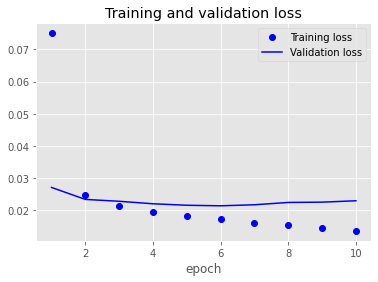

In [ ]:
# Run this cell to show your results #
plot_training_history(history)

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
    
> **1.2.1.3** - Visualize outputs from bidirectional GRU layer, one subplot for B-tags and one subplot for I-tags. Comment on the patterns you observed.
<br />

</div>

### Helper function to visualize the outputs ###


In [ ]:
def get_hidden_output_PCA(model,X_te,y_te,layer_index,out_dimension):
    output = tf.keras.backend.function([model.layers[0].input],[model.layers[layer_index].output])
    hidden_feature=np.array(output([X_te]))
    print(hidden_feature.shape)
    hidden_feature=hidden_feature.reshape(-1,out_dimension)
    print(hidden_feature.shape)
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(hidden_feature)
    print('Variance explained by PCA: {}'.format(np.sum(pca.explained_variance_ratio_)))
    return pca_result

In [ ]:
def visualize_B_I(pca_result):
    color = ['r', 'C1', 'y', 'C3', 'b', 'g', 'm', 'orange']
    category = np.argmax(y_test.reshape(-1,18), axis=1)
    fig, ax = plt.subplots(1,2) 
    fig.set_size_inches(12,6)
    for i in range(2):
        for cat in range(8*i,8*(i+1)):
            indices = np.where(category==cat)[0]
            ax[i].scatter(pca_result[indices,0], pca_result[indices, 1], label=idx2tag[cat],s=2,color=color[cat-8*i],alpha=0.5)
        legend = ax[i].legend(markerscale=3)
        legend.get_frame().set_facecolor('w') 
        ax[i].set_xlabel("first dimension")
        ax[i].set_ylabel("second dimension")
    fig.suptitle("visualization of hidden feature on reduced dimension by PCA")
    
    plt.show()

(1, 4796, 104, 200)
(959200, 104)
Variance explained by PCA: 0.14841617393810413


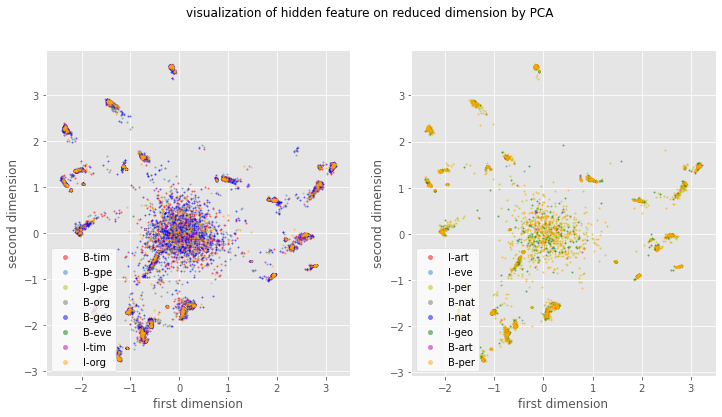

In [ ]:
# Your code here
# Visualization of hidden features
pca_result=get_hidden_output_PCA(model,X_test,y_test,2,out_dimension=y_test.shape[1])
visualize_B_I(pca_result)

**Your answer here**

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">


    
### **1.3 [6 points] MODEL ANALYSIS**
<br />
    
**1.3.1** - For the defined model:
<br />
    
> - Apply the model to the test dataset. Compute an F1 score for each ```Tag``` and store it. 
<br />
    
> - Plot the F1 score per Tag for the defined model using barplots.
<br />
    
> - Briefly discuss the performance of the model
<br />


</div>

In [ ]:
# Your code here
# Apply the model to the test dataset
model.evaluate(X_test,y_test)

150/150 [==============================] - 1s 9ms/step - loss: 0.0241 - accuracy: 0.9934


[0.024124780669808388, 0.9933518171310425]

In [ ]:
def predict(inp,out, model):
  sentence=[idx2word[i] for i in inp]
  tag=[idx2tag[np.argmax(i)] for i in out]
  print('Original:',list(zip(sentence,tag)))
  prediction=model.predict(inp)
  predict_tag=[idx2tag[np.argmax(i)] for i in prediction]
  print('Predicted:',list(zip(sentence,predict_tag)))
  return None

In [ ]:
for i in range(10):
  predict(X_test[i],y_test[i],model)

Original: [('In', 'O'), ('Tehran', 'B-tim'), (',', 'O'), ('the', 'O'), ('chief', 'O'), ('of', 'O'), ('Iran', 'B-geo'), ("'s", 'O'), ('Revolutionary', 'B-geo'), ('Guards', 'I-geo'), (',', 'O'), ('General', 'B-org'), ('Yahya', 'I-org'), ('Rahim', 'I-org'), ('Safavi', 'I-org'), (',', 'O'), ('said', 'O'), ('Saturday', 'B-tim'), ('his', 'O'), ('country', 'O'), ('would', 'O'), ('use', 'O'), ('ballistic', 'O'), ('missiles', 'O'), ('to', 'O'), ('defend', 'O'), ('itself', 'O'), ('if', 'O'), ('attacked', 'O'), ('.', 'O'), ('ENDPAD', 'PAD'), ('ENDPAD', 'PAD'), ('ENDPAD', 'PAD'), ('ENDPAD', 'PAD'), ('ENDPAD', 'PAD'), ('ENDPAD', 'PAD'), ('ENDPAD', 'PAD'), ('ENDPAD', 'PAD'), ('ENDPAD', 'PAD'), ('ENDPAD', 'PAD'), ('ENDPAD', 'PAD'), ('ENDPAD', 'PAD'), ('ENDPAD', 'PAD'), ('ENDPAD', 'PAD'), ('ENDPAD', 'PAD'), ('ENDPAD', 'PAD'), ('ENDPAD', 'PAD'), ('ENDPAD', 'PAD'), ('ENDPAD', 'PAD'), ('ENDPAD', 'PAD'), ('ENDPAD', 'PAD'), ('ENDPAD', 'PAD'), ('ENDPAD', 'PAD'), ('ENDPAD', 'PAD'), ('ENDPAD', 'PAD'), ('ENDPA

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns
import math

In [ ]:
# Your code here
# Plot the F1-score of the model per tag
def get_f1score(X,y,model):
  y_pred=[np.argmax(i) for j in model.predict(X) for i in j]
  y_actual=[np.argmax(i) for j in y for i in j]
  conf_mat=multilabel_confusion_matrix(y_actual,y_pred)
  conf_dict=dict(zip(tags,conf_mat))
  f1_dict={}
  for i in tags:
    tp=conf_dict[i][1,1]
    fp=conf_dict[i][0,1]
    tn=conf_dict[i][0,0]
    fn=conf_dict[i][1,0]
    prec=tp/(tp+fp)
    rec=tp/(tp+fn)
    f1=2*prec*rec/(prec+rec)
    if math.isnan(f1):
      f1_dict[i]=0
    else:
      f1_dict[i]=f1
  fig1=plt.figure(figsize=(14,7))
  sns.barplot(x=list(f1_dict.values()), y=list(f1_dict.keys()),orient='h')
  plt.title('F1 Score for each Tag')
  plt.xlabel('F1 score',fontsize=15)
  plt.ylabel('Tags',fontsize=15)
  return f1_dict

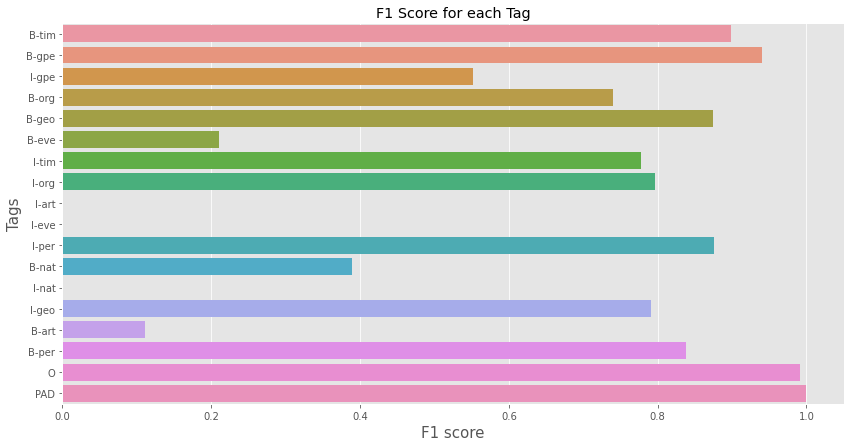

In [ ]:
f1_dict=get_f1score(X_test,y_test,model)

**Your answer here**

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">

### **1.4 [5 points] HOMEWORK QUIZ**
<br />
After attempting this part of the homework, answer the questions on edStem. All the questions depend on this part of the homework and you will not be able to answer them without attempting this part.
<br /><br />
</div>

#### Answer the questions on EdStem

___
___


<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
    
## **PART 2 [65 points]: IMDB Sentiment Analysis using ELMo**
<br />    
Sentiment analysis, also known as opinion mining or emotion AI, is the use of natural language processing, text analysis, computational linguistics, and biometrics to systematically identify, extract, quantify, and study affective states and subjective information.
    
For this part of the homework, we will be using the IMDB dataset, which is publicly available [here](http://ai.stanford.edu/~amaas/data/sentiment/).    

This represents a "many-to-one" problem, with the output classified as a `positive` or `negative` sentiment, depending on the words used in the review.
    
    
In the first part of this section, you are expected to build a language model to train a basic ELMo.
    
Although the original ELMo implementation uses *Character Embeddings*, for the sake of this homework, we will use word embeddings instead.
    
Read more about the ELMo paper [here](https://arxiv.org/pdf/1802.05365.pdf).

In the second part of this subsection, you will use the generated ELMo embeddings in a deep learning model to perform sentiment analysis using the IMDB dataset. 
    
You will compare its performance, with a baseline model without any trained embeddings, and another model which directly uses the `word2vec` embeddings.

<br />
</div>

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">

### **2.1 [20 points] PREPROCESS THE DATASET**
<br />
    
**2.1.1** - Load the dataset

For simplicity, we will use the training split of the IMDB dataset.
- Limit to the most frequent 5000 words.
- Do not skip any frequently occuring words.
- Limit the largest review to a maximum of 200 words only. 
    
    
**NOTE**: You can use the `imdb.get_word_index()` to get the mapping between tokens and words. This will load a dictionary with the mappings, which has to be corrected. Helper code provided below to fix the dictionary.
    
Read more about `tf.keras.datasets.imdb` [here](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb/load_data?version=nightly).    
    
To each review, you must add an end of sentence token \<\/s\> .

Eg. Review: "\<s\> This movie is so bad, I had to leave early"
    
Modified review: "\<s\> This movie is so bad, I had to leave early \<\/s\>"
    
**2.1.2** - Load the `word2vec` embeddings
    
You will use the pre-trained `word2vec` embeddings for this section of the homework. This file is provided to you and can be accessed like a dictionary.
    
Add the \<s\> and\</s\> tokens to the `word2vec` embeddings as random vectors.    
    
**NOTE**: Not all the words in the reviews are present in the embeddings file provided to you. Hence, if it is not present, you must OMIT that word from the sentence.
   
E.g. If `and` token is not present in the embeddings:
   
```
OLD SENTENCE: <s>The movie was good and I really liked it </s>
    
NEW SENTENCE: <s> The movie was good I really liked it </s>
    
``` 
    
<br /><br />
    
**2.1.3** Create `tf.Dataset` for model training:
    
- Create another object called `embeddings_list`, which maps the tokens to their `word2vec` representations.    

- Split the data (`tokens_list`, `embeddings_list`, `class_list`) into 80% training and 20% validation. We will use the `class_list` (which is the sentiment associated with each movie review) only in Part 2.3 for sentiment analysis.
    
- Build a `tf.Dataset` for training, and another one for validation.
    
Define a function to create the dataset. It should have as input the sentences embeddings and the target indices.

Instead of preprocessing the entire dataset, we can preprocess a batch. It is faster and consumes less resources, which is optimal for training.

`dataset.map` enable us to apply a function to each element of the batch individually. The parameter `num_parallel_calls` allow us to control how many threads we will use to feed the network. This function has to output the tensors that will be used in the training in the correct format.

It should output a tuple of two elements.

    1. Source sentences for both LSTMs and the length of the sentnce: (`inputs_f`, `inputs_b`, `inputs_N` )
    2. Target sentences for both LSTMs: (`target_f`,`target_b`)
    
For the same sentence, we will need a target for the forward LSTM and one for the backward LSTM.   
Hence, make sure to create *two* targets in the dataset, `target_f` and `target_b`.    
    

Both `inputs_f` and `inputs_b` will be a `Tensor` with dimensions: `(batch_size,length_of_sentence-1,embedding_dimension)`.
    
Each of the targets,  will be a `Tensor` with dimensions: `(batch_size, length_of_sentence)`.
   
Please refer to Lab 5, on how to use `tf.Dataset` for language models.     
    
<br /><br />
 
    
### **2.2 [20 points] Define and train the model**
    
We define an *ELMo-like* language model using bi-directional LSTMs and residual connections  **without** the character CNN to simplify the analysis. 
    
We will use the `word2vec` embeddings instead of the character representations of the CNN.
    
For simplicity, we train our *ELMo-like* language model on the IMDB dataset itself. But generally, language models are trained on much larger corpuses.    
    
**2.2.1** Building the language model
    
The model should have as an input *padded_sentences* followed by a `tf.keras.layers.Masking()` layer.   
    
After this, you can use the helper code given below to split the input data to feed the *forward* and *backward* LSTMs.
    
Refer to the image from the session 6 slide on ELMo.
    
![](./part2images/forward_backward.png) 
    

Remember to use the **same** *softmax* layer ` on both the forward and the backward LSTMs. This will give you an `output_f` and `output_b` which you will evaluate with your two targets.
    
Refer to the session 6 slides for more clarity.       

![](./part2images/loss.png)

Use an appropriate loss function, and optimizer and train the network sufficiently.    
    
**2.2.2** Extracting ELMo embeddings
    
Use the Functional API to build another model called `Toy_ELMo` to obtain the embeddings of the model. 

    

The embeddings obtained should be: 
    
1. The `word2vec` embeddings 
        
    This is just the output after the masked layer in the language model defined above.    
    
2. The first bidirectional-LSTM layer embeddings 

    This will be the concatenation of the first LSTM layers of the language model (`h1_f + h1_b`).
    
3. The second bidirectional-LSTM layer embeddings

    This will be the concatenation of the second LSTM layer of the language model (`h2_f + h2_f`).    
    
You can use the helper code provided in this sub-section to obtain the concatenation of the different embeddings.             
    
<br /><br />
    
### **2.3 [20 points] Transfer Learning**
<br />
    
Once you've sufficiently trained your ELMo embeddings, we can use it for a down-stream task such as sentiment analysis.
    
You have already done sentiment analysis using `tf.keras.layers.Embedding()` in Session 5. You will now aim to beat that baseline using your ELMo embeddings.    
    
**2.3.1** - Baseline model:
    
For the baseline model, you will use:
    
> - `tf.keras.Layers.Embedding()` layer
> -  2 layers of `LSTM` with `hidden_size=300` 
    
       
Train it for sufficient epochs using an appropriate optimizer and learning rate.
    
**2.3.2** - Directly using pre-trained `word2vec`:
    
For this section, use the pre-trained `word2vec` embeddings directly into your model. 
    
You will build a `tf.Dataset` similar to the one created in Section 2.1 but instead of having a target as a series, the target should only be a class (positive or negative sentiment).    
    
Train, and compare its performance with the baseline model defined above **using the same architecture** as above.
    
**2.3.3** - Using ELMo embeddings:
    
    
> - Define the same model as above but use the `Toy_ELMo` after the input layer. 
    
**NOTE**: Set `Toy_ELMo.trainable` to `False` to avoid retraining the model. 
        
> - Create the **sauce** layer to combine the three embeddings from your `Toy_ELMo`. You should have **three** trainable parameters in this layer

<img src="./part2images/sauce.png" alt="drawing" style="width:300px;"/>    
    
Since we are not using any other embeddings, we will set the value of $\gamma$ to 1.     
> - Train the modified model sufficiently, and compare it to the previously trained models.

<br /><br />
    
### **2.4 [5 points] HOMEWORK QUIZ**
<br />
After attempting this part of the homework, answer the questions on edStem. All the questions depend on this part of the homework and you will not be able to answer them without attempting this part.
  
<br /><br />

</div>

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">

## **PART 2: Solutions**    

### **2.1 [20 points] PREPROCESS THE DATASET**
<br />
    
**2.1.1** - Load the dataset

For simplicity, we will use the training split of the IMDB dataset.
- Limit to the most frequent 5000 words.
- Do not skip any frequently occuring words.
- Limit the largest review to a maximum of 200 words only. 
    
    
**NOTE**: You can use the `imdb.get_word_index()` to get the mapping between tokens and words. This will load a dictionary with the mappings, which has to be corrected. Helper code provided below to fix the dictionary.
    
Read more about `tf.keras.datasets.imdb` [here](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb/load_data?version=nightly).    
    
To each review, you must add an end of sentence token \<\/s\> .

Eg. Review: "\<s\> This movie is so bad, I had to leave early"
    
Modified review: "\<s\> This movie is so bad, I had to leave early \<\/s\>"


<br /><br />

</div>

In [3]:
data_train, data_test = tf.keras.datasets.imdb.load_data(
    path='imdb.npz', num_words=5000, skip_top=0, maxlen=200, seed=113,
    start_char=1, oov_char=2, index_from=3)

17465344/17464789 [==============================] - 0s 0us/step


In [4]:
# Split the train and test data appropriately into text and label

label_train = data_train[1]
data_train = data_train[0]

label_test = data_test[1]
data_test = data_test[0]

In [5]:
### Helper code to fix the mapping of the imdb word index
index = tf.keras.datasets.imdb.get_word_index()
# we need to add 3 from the indices because 0 is 'padding', 1 is 'start of sequence' and 2 is 'unknown'
inv_index = { j+3:i for i,j in index.items()}

# Tags for start and end of sentence
inv_index[1] = '<s>' 
inv_index[2] = '<UNK>'
inv_index[3] = '</s>'

index = { j:i for i,j in inv_index.items()}

1646592/1641221 [==============================] - 0s 0us/step


In [6]:
# Your code here
data_train  = [i + [3] for i in data_train]
data_test  = [i + [3] for i in data_test]

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
    
**2.1.2** - Load the `word2vec` embeddings
    
You will use the pre-trained `word2vec` embeddings for this section of the homework. This file is provided to you and can be accessed like a dictionary.
    
Add the \<s\> and\</s\> tokens to the `word2vec` embeddings as random vectors.    
    
**NOTE**: Not all the words in the reviews are present in the embeddings file provided to you. Hence, if it is not present, you must OMIT that word from the sentence.
   
E.g. If `and` token is not present in the embeddings:
   
```
OLD SENTENCE: <s>The movie was good and I really liked it </s>
    
NEW SENTENCE: <s> The movie was good I really liked it </s>
    
``` 
        
    
<br />    


</div>

In [7]:
EMBEDDING_FILE = '/root/input/GoogleNews-vectors-negative300.bin.gz'
!wget -P /root/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2021-05-23 08:56:07--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.0.246
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.0.246|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘/root/input/GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  44.1MB/s    in 37s     

2021-05-23 08:56:44 (43.0 MB/s) - ‘/root/input/GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [8]:
from gensim.models import KeyedVectors
word2vec = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

In [9]:
# Your code here
# Create new dictionary with tokens as keys and word2vec embeddings as values
tok_to_emb = {}
# For each word in our vocabulary
for word in index.keys():
  # If word is in word2vec vocabulary
  if word in word2vec.vocab.keys():
    token = index.get(word) # token
    emb = word2vec.word_vec(word) # word2vec embedding
    tok_to_emb[token] = emb

# Add the <s> and </s> tokens as random vectors
tok_to_emb[1] = np.random.rand(300,)
tok_to_emb[3] = np.random.rand(300,)

In [10]:
embedding_list=[]
for i in data_train:
  embed_sent=[]
  for j in i:
    try:
      emb=tok_to_emb[j]
      embed_sent.append(emb)
    except KeyError:
      continue 
  embedding_list.append(embed_sent)

In [11]:
X_embed_train, X_embed_val,X_token_train, X_token_val, class_list_train,class_list_val=train_test_split(embedding_list,data_train,label_train,train_size=0.8,stratify=label_train)

In [12]:
len(X_embed_train)

11395

In [13]:
len(class_list_train)

11395

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
        
    
**2.1.3** Create `tf.Dataset` for model training:
    
- Create another object called `embeddings_list`, which maps the tokens to their `word2vec` representations.    

- Split the data (`tokens_list`, `embeddings_list`, `class_list`) into 80% training and 20% validation. We will use the `class_list` (which is the sentiment associated with each movie review) only in Part 2.3 for sentiment analysis.
    
- Build a `tf.Dataset` for training, and another one for validation.
    
Define a function to create the dataset. It should have as input the sentences embeddings and the target indices.

Instead of preprocessing the entire dataset, we can preprocess a batch. It is faster and consumes less resources, which is optimal for training.

`dataset.map` enable us to apply a function to each element of the batch individually. The parameter `num_parallel_calls` allow us to control how many threads we will use to feed the network. This function has to output the tensors that will be used in the training in the correct format.

It should output a tuple of two elements.

    1. Source sentences for both LSTMs and the length of the sentnce: (`inputs_f`, `inputs_b`, `inputs_N` )
    2. Target sentences for both LSTMs: (`target_f`,`target_b`)
    
For the same sentence, we will need a target for the forward LSTM and one for the backward LSTM.   
Hence, make sure to create *two* targets in the dataset, `target_f` and `target_b`.    
    

Both `inputs_f` and `inputs_b` will be a `Tensor` with dimensions: `(batch_size,length_of_sentence-1,embedding_dimension)`.
    
Each of the targets,  will be a `Tensor` with dimensions: `(batch_size, length_of_sentence)`.
   
Please refer to Lab 5, on how to use `tf.Dataset` for language models.       
        
<br /><br />

</div>

In [14]:
del word2vec

In [15]:
# Helper code

# Fill the required cells to complete the function
def transform_pad(input_tensor, input_target, input_N):
    # Transform the input for the f and b LSTM
    input_f  = [i[:-1] for i in input_tensor]
    input_b  = [i[1:] for i in input_tensor]
    
    # Transform the target for the f and b LSTM
    target_f  = [i[1:] for i in input_target]
    target_b  = [i[:-1] for i in input_target]
    
    # Pad the inputs
    input_f  = pad_sequences(input_f,maxlen=max(input_N),padding='post')
    input_b  = pad_sequences(input_b,maxlen=max(input_N),padding='post')
    
    # Pad the targets
    target_f = pad_sequences(target_f,maxlen=input_N,padding='post')
    target_b = pad_sequences(target_b,maxlen=input_N,padding='post')
    
    return (input_f, input_b, input_N), (target_f, target_b)

def create_ragged(inp,target):
    inp=np.array_split(inp,4)
    target=np.array_split(target,4)
    ragged_input  = [tf.ragged.constant(i, dtype=tf.float32) for i in inp]
    ragged_target = [tf.ragged.constant(i, tf.int32) for i in target]
    ragged_input= tf.concat(ragged_input, axis=0)
    ragged_target= tf.concat(ragged_target, axis=0)
    return ragged_input, ragged_target

def create_dataset(data_in, target_in):
   
    #Get the length of each sentence
    N = [len(i) for i in data_in]
    tensor_N = tf.constant(N, tf.int32)
    
    # Create ragged tensors 
    ragged_input, ragged_target=create_ragged(data_in,target_in)
    
    # Build the dataset and the operations
    dataset = tf.data.Dataset.from_tensor_slices((ragged_input, ragged_target, tensor_N))
    dataset = dataset.shuffle(1000)
    dataset = dataset.batch(256)
    del ragged_input
    del ragged_target
# Transform_pad function is defined above; you can change the num_parallel_calls   
    dataset = dataset.map(transform_pad, num_parallel_calls=4)
    
                          
    dataset = dataset.prefetch(1)
    return dataset

In [ ]:
# Your code here
dataset_train=create_dataset(X_embed_train,X_token_train)
dataset_val=create_dataset(X_embed_val,X_token_val)

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
    
### **2.2 [20 points] Define and train the model**
    
We define an *ELMo-like* language model using bi-directional LSTMs and residual connections  **without** the character CNN to simplify the analysis. 
    
We will use the `word2vec` embeddings instead of the character representations of the CNN.
    
For simplicity, we train our *ELMo-like* language model on the IMDB dataset itself. But generally, language models are trained on much larger corpuses.    
    
**2.2.1** Building the language model
    
The model should have as an input *padded_sentences* followed by a `tf.keras.layers.Masking()` layer.   
    
After this, you can use the helper code given below to split the input data to feed the *forward* and *backward* LSTMs.
    
Refer to the image from the session 6 slide on ELMo.
    
![](./part2images/forward_backward.png) 
    

Remember to use the **same** *softmax* layer* on both the forward and the backward LSTMs. 
    
This will give you an `output_f` and `output_b` which you will evaluate with your two targets.
    
Refer to the session 6 slides for more clarity.       

![](./part2images/loss.png)

Use an appropriate loss function, and optimizer and train the network sufficiently.   
 
<br/>

</div>    

In [ ]:
# Your code here


<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
   

**2.2.2** Extracting ELMo embeddings
    
Use the Functional API to build another model called `Toy_ELMo` to obtain the embeddings of the model. 

    

The embeddings obtained should be: 
    
1. The `word2vec` embeddings 
        
    This is just the output after the masked layer in the language model defined above.    
    
2. The first bidirectional-LSTM layer embeddings 

    This will be the concatenation of the first LSTM layers of the language model (`h1_f + h1_b`).
    
3. The second bidirectional-LSTM layer embeddings

    This will be the concatenation of the second LSTM layer of the language model (`h2_f + h2_f`).    
    
You can use the helper code provided in this sub-section to obtain the concatenation of the different embeddings.             
    
<br /><br />
      

</div>    

In [ ]:
# Helper code
# In a sentence <s> t1 t2 t2 t4 </s>
#The input of the forward network is  : <s> t1 t2 t2 t4
#The input of the backward network is : t1 t2 t2 t4 </s>
# The embeddings are shifted one position.

# First we remove the embedding corresponding to the </s> token from the backwards hidden states
# Assuming that inputs_N contains the length of each sentence
# h1_b and h2_b are the hidden states for the first and second backwards LSTMs
mask1 = tf.sequence_mask(inputs_N-2, tf.shape(h1_b)[1]) 
mask2 = tf.math.logical_not(tf.sequence_mask(inputs_N -1,tf.shape(h1_b)[1])) 
mask = tf.math.logical_or(mask1, mask2)

# We invert the backwards embeddings
h1_b = h1_b[:,::-1,:]
h2_b = h2_b[:,::-1,:]
h1_b_m = tf.reshape(h1_b[mask],(tf.shape(h1_b)[0], tf.shape(h1_b)[1]-1, h_size) )
h2_b_m = tf.reshape(h2_b[mask],(tf.shape(h2_b)[0], tf.shape(h2_b)[1]-1, h_size) )

In [ ]:
# Your code here


<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">

### **2.3 [20 points] Transfer Learning**
<br />
    
Once you've sufficiently trained your ELMo embeddings, we can use it for a down-stream task such as sentiment analysis.
    
You have already done sentiment analysis using `tf.keras.layers.Embedding()` in Session 5. You will now aim to beat that baseline using your ELMo embeddings.    
    
**2.3.1** - Baseline model:
    
For the baseline model, you will use:
    
> - `tf.keras.Layers.Embedding()` layer
> -  2 layers of `LSTM` with `hidden_size=300` 
    
       
Train it for sufficient epochs using an appropriate optimizer and learning rate.

<br />

</div>    

In [ ]:
# Your code here


<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">

    
    
**2.3.2** - Directly using pre-trained `word2vec`:
    
For this section, use the pre-trained `word2vec` embeddings directly into your model. 
    
You will build a `tf.Dataset` similar to the one created in Section 2.1 but instead of having a target as a series, the target should only be a class (positive or negative sentiment).    
    
Train, and compare its performance with the baseline model defined above **using the same architecture** as above.

<br />
</div>    

In [ ]:
# Your code here


<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">  
    
**2.3.3** - Using ELMo embeddings:
    
    
> - Define the same model as above but use the `Toy_ELMo` after the input layer. 
    
**NOTE**: Set `Toy_ELMo.trainable` to `False` to avoid retraining the model. 
        
> - Create the **sauce** layer to combine the three embeddings from your `Toy_ELMo`. You should have **three** trainable parameters in this layer

<img src="./part2images/sauce.png" alt="drawing" style="width:300px;"/>    
    
Since we are not using any other embeddings, we will set the value of $\gamma$ to 1.     
> - Train the modified model sufficiently, and compare it to the previously trained models.

<br />


</div>    

In [ ]:
# Your code here


**Your answer here**

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0"> 

### **2.4 [5 points] HOMEWORK QUIZ**
<br />
After attempting this part of the homework, answer the questions on edStem. All the questions depend on this part of the homework and you will not be able to answer them without attempting this part.
  
<br />

</div>    

#### Answer the questions on EdStem

___
___
